# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [4]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [5]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Extracting the dataset

I have extracted the dataset and read it

In [6]:
# Loaded the fraud dataset from the specified CSV file path into a dataframe
fraud_dataset = pd.read_csv("C:/Users/CHITRADIP/OneDrive/Desktop/Dissertation/Dataset/creditcard.csv")

I displayed the first few rows of the dataset

In [7]:
# In order to get an overview of the dataset, displayed the first few rows of the dataset
fraud_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Analysis

I calculated the length of the total dataset

In [8]:
# Calculated and displayed the total length (size) of the dataset
len(fraud_dataset)

284807

# Gathering Statistical Analysis

I gathered a statistical information of the various factors of the dataset

In [9]:
# Generated the descriptive statistics of the dataset for better information. This contains count, mean, standard deviation, minimum value, 25%, 50%, 75% and maximum values of each column 
fraud_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


I gathered information about the type of values of the various factors

In [10]:
# Printed and displayed a summary of the dataframe which includes the index dtypes and column dtypes, non-null values and the memory usage
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Null Value Evaluation

I displayed all the null values in my dataset to check weather I have any

In [11]:
# Calculated the number of missing values in each column of the dataset
fraud_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

I don't have any null values in my dataset

In [12]:
# Tried to find out the maximum number of missing values in any column of my dataset
fraud_dataset.isnull().sum().max()

0

# Correlation Analysis

I analyzed the correlation of the various factors with the class fraudulent/non-fraudulent

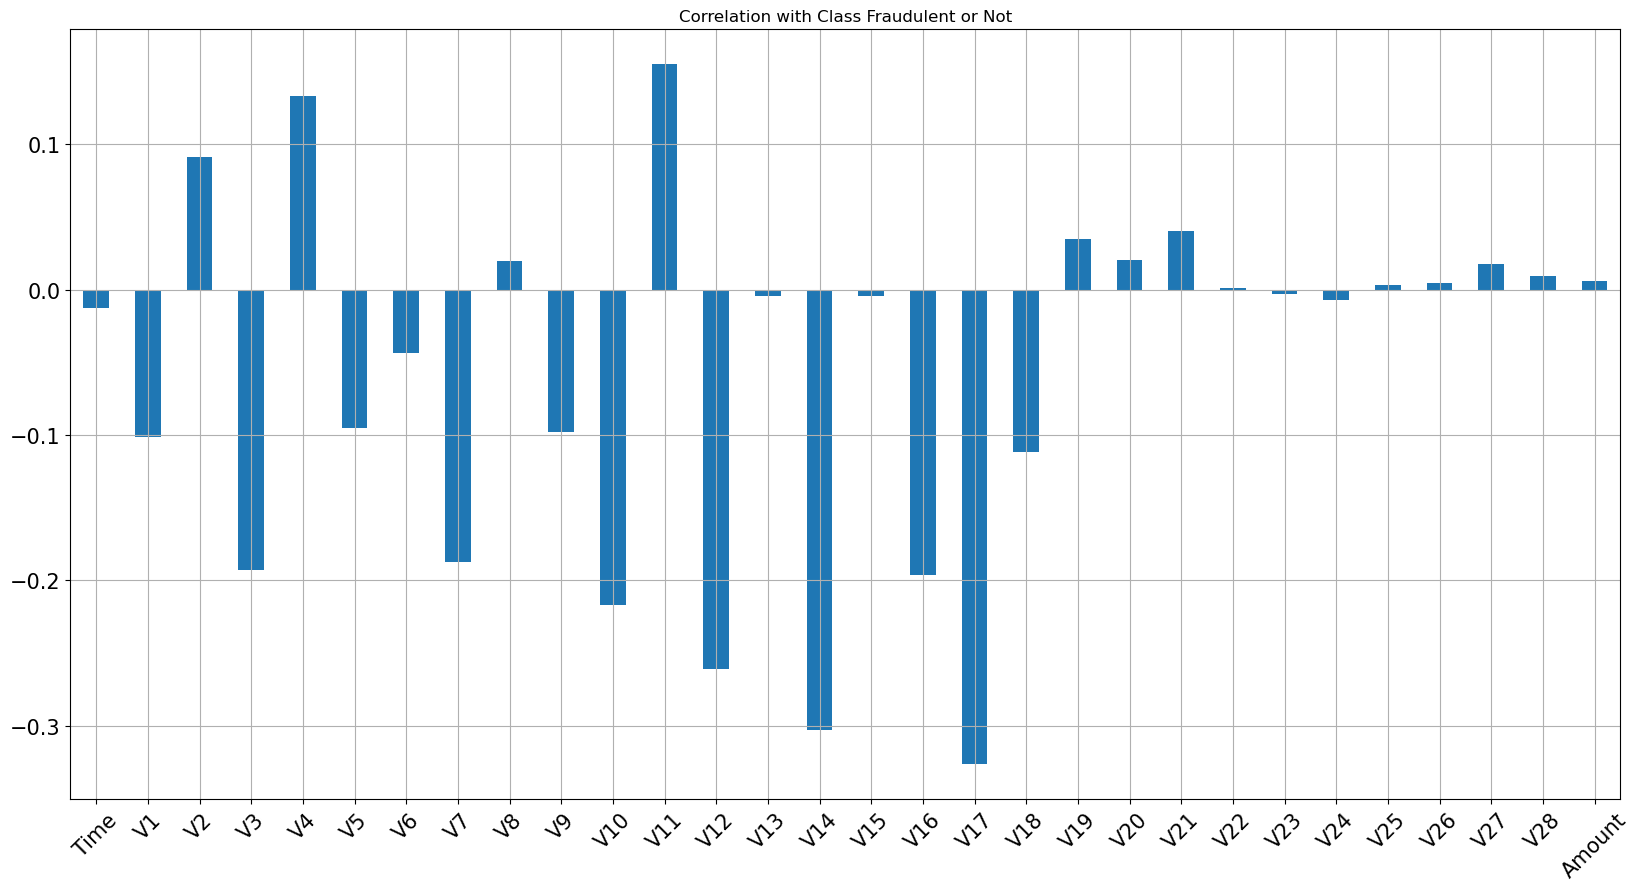

In [13]:
# Dropped the class column to focus on the other features for correlation analysis
data2 = fraud_dataset.drop(columns = ['Class'])

# Calculated the correlation of each feature with the Class column and plotted it as a bar chart
data2.corrwith(fraud_dataset.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15, # The size of the plot, title and fontsize for labels have been set
        rot = 45, grid = True) # The x-axis label has been rotated 45 degrees for the better readibility
# Displayed the plot
plt.show() 

# Histogram Analysis

I generated a histogram of all the columns in the dataset

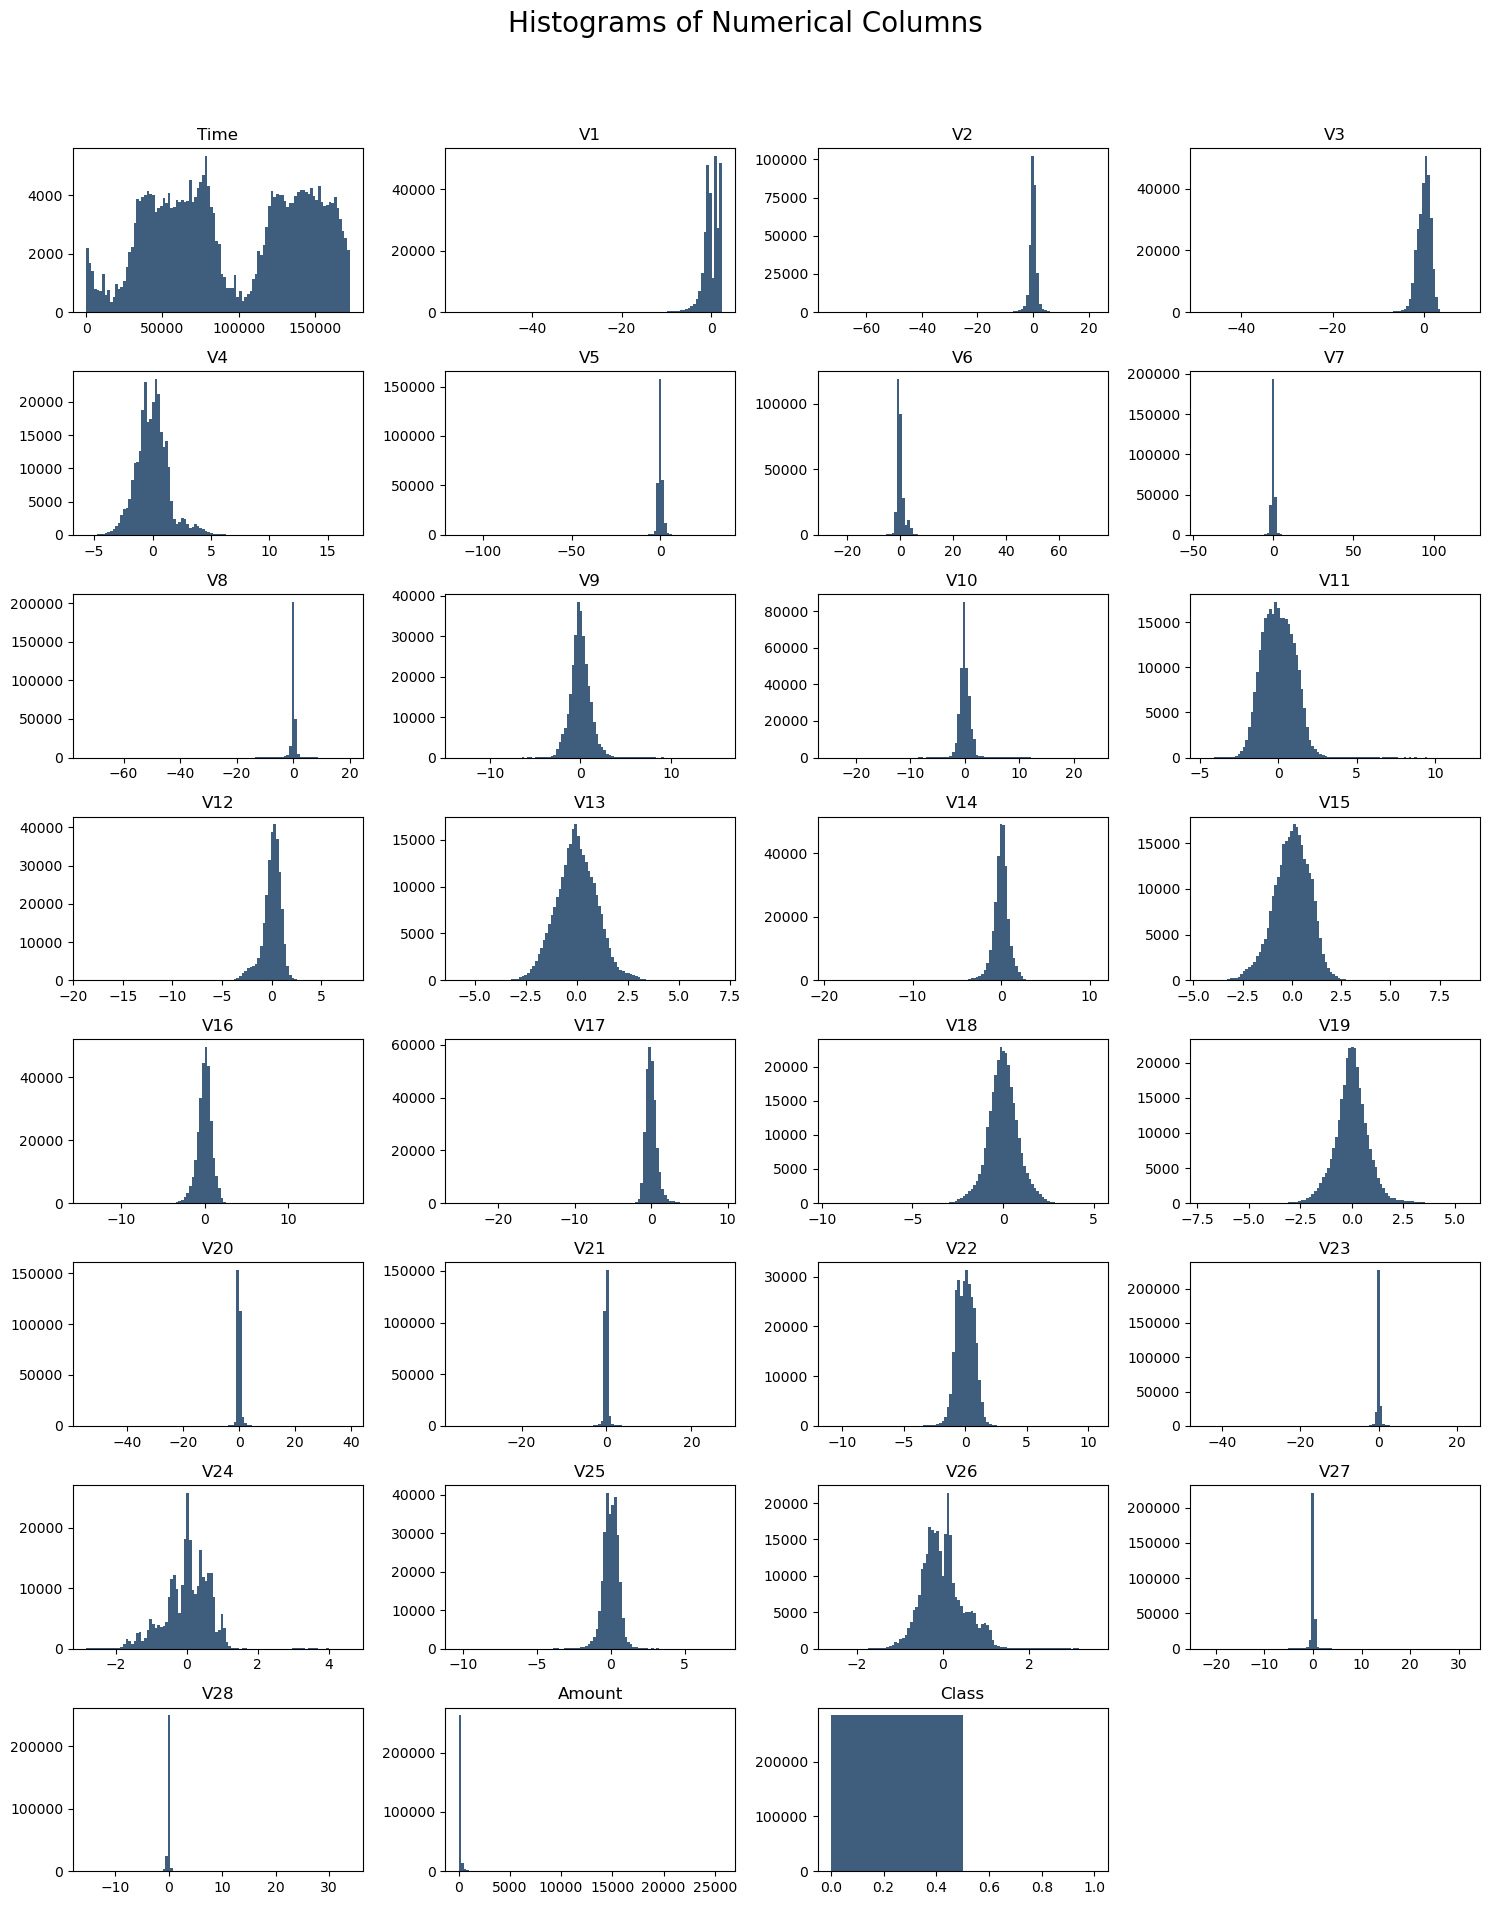

In [14]:
# Histogram Analysis
# A new figure with the specified size has been created
fig = plt.figure(figsize=(15, 20))

# The main title of the figure is set
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(fraud_dataset.shape[1]): # Iteration over each of the columns of the dataset is carried out
    plt.subplot(8, 4, i + 1) # A subplot for each of the columns is created
    f = plt.gca() # The current axis is retrieved
    f.set_title(fraud_dataset.columns.values[i]) # The title of the subplot will be the column name 

    vals = np.size(fraud_dataset.iloc[:, i].unique()) # To retrieve the number of unique values in the column
    if vals >= 100:
        vals = 100  # limit our bins to 100 maximum
    
    plt.hist(fraud_dataset.iloc[:, i], bins=vals, color='#3F5D7D') # A histogram of the columns is plotted keeping in mind of the specified bins and colour mentioned
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # In order to prevent overlap, the layout is adjusted

# Analysis of Time and Amount Columns

I generated seperate distribution plots for the amount and time columns in the dataset

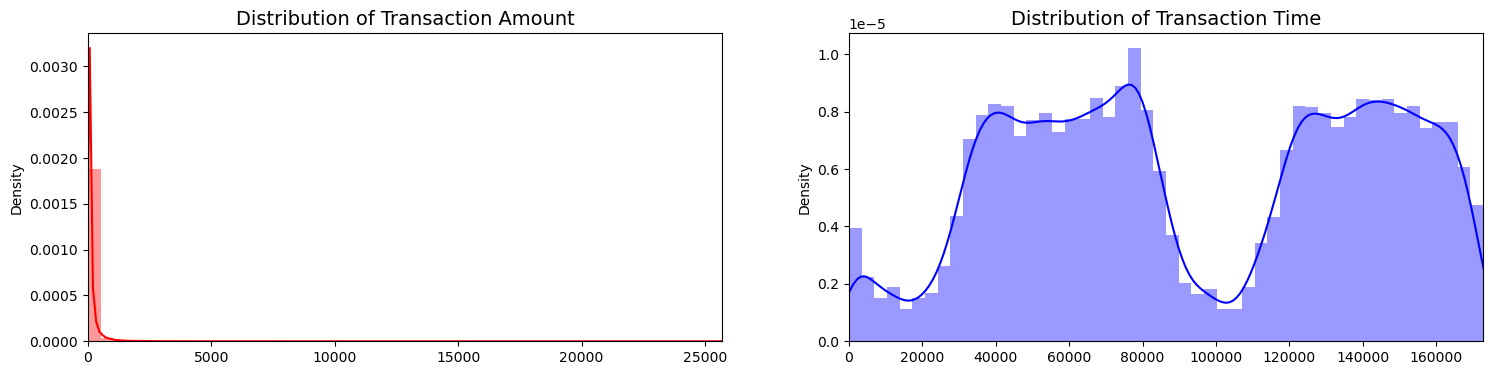

In [15]:
# A figure with the specified size is to be created
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# The amount column values are extracted
amount_val = fraud_dataset['Amount'].values

# The time column values are extracted
time_val = fraud_dataset['Time'].values

# We plotted the distribution of transaction amounts
sns.distplot(amount_val, ax=ax[0], color='r') # A distribution plot for the amount column is created in the first subplot whose colour will be red
ax[0].set_title('Distribution of Transaction Amount', fontsize=14) # The title for the first subplot is set
ax[0].set_xlim([min(amount_val), max(amount_val)]) # The x-axis limits for the first subplot is set

# We plotted the distribution of times
sns.distplot(time_val, ax=ax[1], color='b') # To create a distribution plot for the time data in the second subplot whose colour will be blue
ax[1].set_title('Distribution of Transaction Time', fontsize=14) # The title of the second sub-plot is set
ax[1].set_xlim([min(time_val), max(time_val)]) # The x-axis limits of the second subplot is set 

# The figure is displayed
plt.show()

# Standardizing the Amount and Time Column

From the plots of time and amount, I realized that they are highly skewed and need to be scaled. I have done this by using the  RobustScaler function. The new columns have been named as scaled_amount and scaled_time. They have been incorporated in the beginning of the dataset. This will make the predictions more accurate when we use the machine learning algorithm.

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler() # Initialized a StandardScaler object
rob_scaler = RobustScaler() # Initialized a RobustScaler object

# Scaled the amount column by using RobustScaler. Added it as a new column called scaled_amount
fraud_dataset['scaled_amount'] = rob_scaler.fit_transform(fraud_dataset['Amount'].values.reshape(-1,1))

# Scaled the time column by using RobustScaler. Added it as a new column called scaled_time 
fraud_dataset['scaled_time'] = rob_scaler.fit_transform(fraud_dataset['Time'].values.reshape(-1,1))

# Finally dropped the original amount and time column from the dataset
fraud_dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
scaled_amount = fraud_dataset['scaled_amount'] # The scaled_amount column in extracted
scaled_time = fraud_dataset['scaled_time'] # The scaled_time column is extracted

# The scaled_amount and scaled_time columns have been dropped from their current positions
fraud_dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# The scaled_amount column has been inserted at the first position which is the 0th index
fraud_dataset.insert(0, 'scaled_amount', scaled_amount)

# The scaled_time column has been inserted at the second position which is the 1st index
fraud_dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

fraud_dataset.head() # To verify the changes the first few rows of the dataset in displayed

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Duplicate Handling

This part of the code is used to check if there are any duplicates in the fraud_dataset. Since it had duplicates the output came as true.

In [18]:
# To check for any rows which have duplicates in the dataset 
fraud_dataset.duplicated().any()

True

In this part of the code I have removed the duplicates from the fraud_dataset

In [19]:
# To drop any duplicate rows if present in the dataset
fraud_dataset = fraud_dataset.drop_duplicates()

After removing the duplicates I observe the shape of the fraud_dataset to know how many rows and columns it has

In [20]:
# To get the dimensions of the data set which include the number of rows and columns
fraud_dataset.shape

(283726, 31)

The class variable is the one in our fraud_dataset which tells us weather a transaction is fraudulent or non-fraudulent. If it is 0 the transaction is non-fraudulent and if it is 1 the transaction is fraudulent. In this part of the code I have calculated and shown how many transactions are fraudulent and how many are non-fraudulent.

In [21]:
# To retrieve the count of each unique value in the class column
fraud_dataset['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# Graphical Visualization of Class Imbalance

For better visualization of the difference between the numbers of the fraudulent and non-fraudulent transactions, I have used colours to plot them. The blue colour represents the non-fraudulent transactions and the red colour represents the fraudulent transactions. The stark difference can be observed.

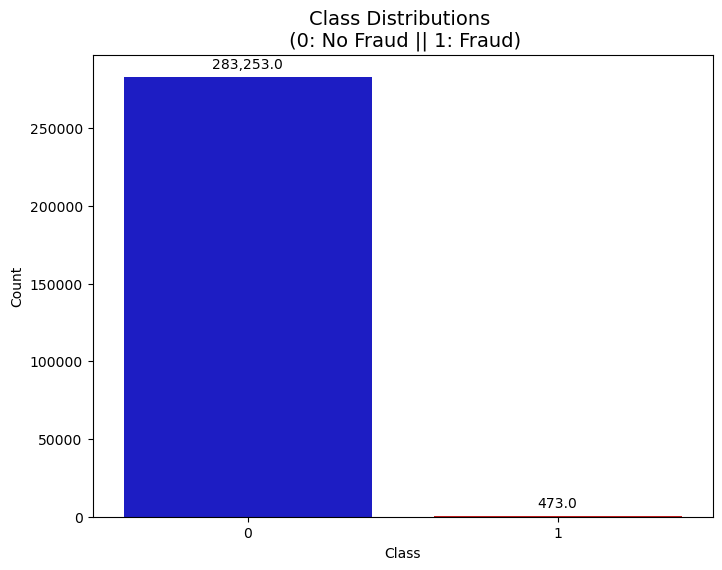

In [22]:
# The colours for the plot have been defined
colors = ["#0101DF", "#DF0101"]

# The count plot has been created
plt.figure(figsize=(8, 6)) # The size of the figure has been set
ax = sns.countplot(x='Class', data=fraud_dataset, palette=colors) # A countplot for the Class column is created with the colours defined

# Annotations are added for each bar in the count plot
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','), # The height of the bar is formatted as a string with commas
        (p.get_x() + p.get_width() / 2., p.get_height()), # The position of the annotations is set
        ha='center', va='center', # Aligned the annotations to the center
        xytext=(0, 9), # The annotations have been offset by 9 points vertically
        textcoords='offset points' # The offset points have been used for text coordinates
    )

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14) # The title of the plot has been set
plt.xlabel('Class') # The x-axis label will be Class
plt.ylabel('Count') # The y-axis label will be count of the Class
plt.show() # The plot is displayed

# Dataset preperation for training and testing using Machine Learning Classifiers

This part of the code separates the features (input variables) and the target (output variables) from the fraud_dataset which will be used for the machine learning algorithms.

In [23]:
# To separate the features (x) from the target variables (y)

# The Class column has been dropped from the dataset to retrieve the features
X = fraud_dataset.drop('Class', axis = 1)

# The Class column has been retrieved as the target variable
y=fraud_dataset['Class']

I have imported the necessary function 

In [24]:
# The necessary function to be used is train_test_split which us imported from the sklearn.model_selection
from sklearn.model_selection import train_test_split 

This part of the code splits the data into training and testing sets which will be used in the machine learning algorithms

In [25]:
# Splitting the dataset into training and testing splits

# The 20% dataset has been kept for testing and the random seed has been kept for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

I import the necessary libraries

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Using Logistic Regression, Decision Tree, Random Forest and Support Vector Machine Classifiers for training and testing 

We will be using 4 machine learning algorithms to test which has better performance for the fraud_dataset. They are logistic regression, decision tree, random forest and support vector machine. This part of the code trains and evaluates the four different machine learning classifiers that I talked about. The performacne classifiers include accuracy, precision, recall and f1-score.

In [27]:
# A dictionary of classifiers have been defined 
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# I have iterated over each classifier in the dictionary
for name, clf in classifier.items():
    print(f"\n=========={name}===========") # The name of the machine learning classifier is printed
    clf.fit(X_train, y_train) # The classifier is fitted to the training data
    y_pred = clf.predict(X_test) # The labels of the test data is predicted
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}") # The accuracy scores are printed
    print(f"\n Precision: {precision_score(y_test, y_pred)}") # The precision scores are printed
    print(f"\n Recall: {recall_score(y_test, y_pred)}") # The recall scores are printed
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}") # The f1-score scores are printed


==========Logistic Regression===========

 Accuaracy: 0.9991365030134283

 Precision: 0.8867924528301887

 Recall: 0.5222222222222223

 F1 Score: 0.6573426573426573

==========Decision Tree Classifier===========

 Accuaracy: 0.999066013463504

 Precision: 0.6907216494845361

 Recall: 0.7444444444444445

 F1 Score: 0.7165775401069518

==========Random Forest Classifier===========

 Accuaracy: 0.9995241955380115

 Precision: 0.9565217391304348

 Recall: 0.7333333333333333

 F1 Score: 0.8301886792452831

==========Support Vector Machine===========

 Accuaracy: 0.9993832164381631

 Precision: 0.9661016949152542

 Recall: 0.6333333333333333

 F1 Score: 0.7651006711409396


#  Statistical Analysis to know which Classifier is the Best

In this part of the code I have done a statistical analysis to identify which classifier performs the best according the performance metrics as a credit card fraud detection system.

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store the results
results = {
    "Model": [], # The name of the model gets stored 
    "Accuracy": [], # The accuracy scores of each model is stored
    "Precision": [], # The precision scores of each model is stored
    "Recall": [], # The recall scores of each model is stored
    "F1 Score": [] # The f1-scores of each model is stored
}

# Iterate over each classifier in the dictionary
# The 'classifier' is used as a dictionary whose keys are the model names
# The values are the classifier instances
for name, clf in classifier.items():
    clf.fit(X_train, y_train)  # The classifier is fitted with the training data
    y_pred = clf.predict(X_test)  # The trained model is used to predict the labels of the test data (X_test)
    
    # The name of the model as well as the corresponding evaluation metric is appended to the results dictionary
    results["Model"].append(name) # The name of the current model is added
    results["Accuracy"].append(accuracy_score(y_test, y_pred)) # The accuracy score is added
    results["Precision"].append(precision_score(y_test, y_pred)) # The precision score is added
    results["Recall"].append(recall_score(y_test, y_pred)) # The recall score is added
    results["F1 Score"].append(f1_score(y_test, y_pred)) # The f1-score score is added

# The results dictionary is converted to a pandas dataframe for ease in manupulation and display
results_df = pd.DataFrame(results)

# The results summary dataframe is printed
print("Results Summary:")
print(results_df)

# The best model for each metric is identified which is the model having the highest score for that metric
best_models = {
    "Accuracy": results_df.loc[results_df['Accuracy'].idxmax()]['Model'], # This is the model with the highest accuracy
    "Precision": results_df.loc[results_df['Precision'].idxmax()]['Model'], # This is the model with the highest precision
    "Recall": results_df.loc[results_df['Recall'].idxmax()]['Model'], # This is the model with the highest recall
    "F1 Score": results_df.loc[results_df['F1 Score'].idxmax()]['Model'] # This is the model with the highest f1-score
}

# The best model for each metric is printed
print("\nBest Models Based on Each Metric:")
for metric, model in best_models.items():
    print(f"{metric}: {model}")

# The rank of the model is calculated by calculating the mean of the rank across all metrics 
results_df['Rank'] = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].rank(ascending=False).mean(axis=1)
best_overall_model = results_df.loc[results_df['Rank'].idxmin()]['Model']

# The overall best model is printed
print(f"\nOverall Best Model: {best_overall_model}")

Results Summary:
                      Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.999137   0.886792  0.522222  0.657343
1  Decision Tree Classifier  0.999031   0.680412  0.733333  0.705882
2  Random Forest Classifier  0.999542   0.970588  0.733333  0.835443
3    Support Vector Machine  0.999383   0.966102  0.633333  0.765101

Best Models Based on Each Metric:
Accuracy: Random Forest Classifier
Precision: Random Forest Classifier
Recall: Decision Tree Classifier
F1 Score: Random Forest Classifier

Overall Best Model: Random Forest Classifier


# Confusion Matrix Of Individual Classifiers

# Confusion Matrix for Logistic Regression Classifier

In this part of the code I have shown the confusion matrix for the logistic regression classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 47
True Negatives (TN): 56650
False Positives (FP): 6
False Negatives (FN): 43


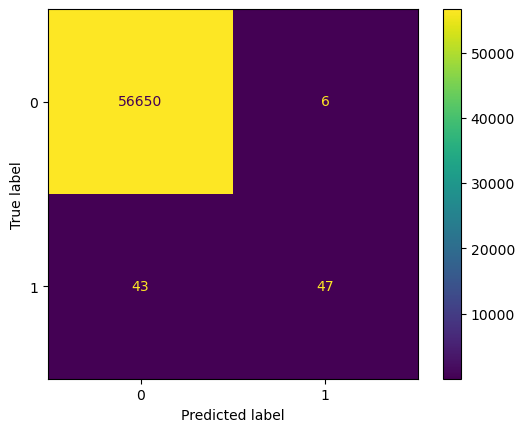

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
clf = LogisticRegression() # A logistic Regression calssifier instance is initiated
clf.fit(X_train, y_train) # The logistic regression classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for Decision Tree Classifier

In this part of the code I have shown the confusion matrix for the decision tree classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 65
True Negatives (TN): 56627
False Positives (FP): 29
False Negatives (FN): 25


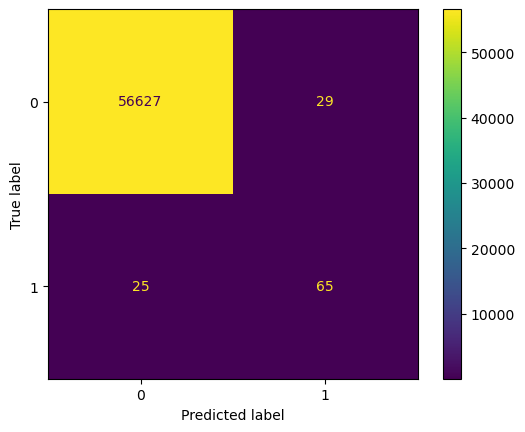

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Classifier
clf = DecisionTreeClassifier() # A Decision Tree calssifier instance is initiated
clf.fit(X_train, y_train) # The Decision Tree classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed 
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for the Random Forest Classifier

In this part of the code I have shown the confusion matrix for the random forest classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 66
True Negatives (TN): 56654
False Positives (FP): 2
False Negatives (FN): 24


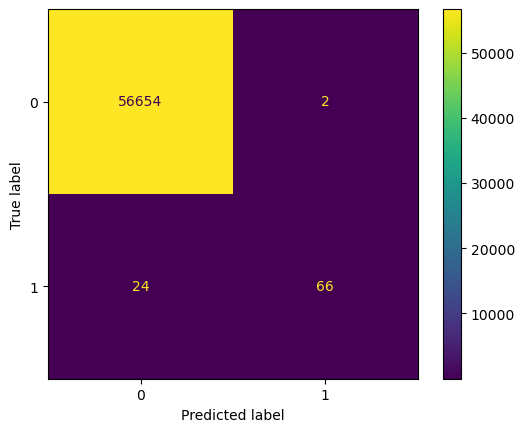

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest Classifier
clf = RandomForestClassifier() # A Random Forest calssifier instance is initiated
clf.fit(X_train, y_train) # The Random Forest classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed 
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed

# Confusion Matrix for the Support Vector Machine Classifier

In this part of the code I have shown the confusion matrix for the support vector machine classifier and have also printed the true positive, true negative, false positive and false negative values.

True Positives (TP): 57
True Negatives (TN): 56654
False Positives (FP): 2
False Negatives (FN): 33


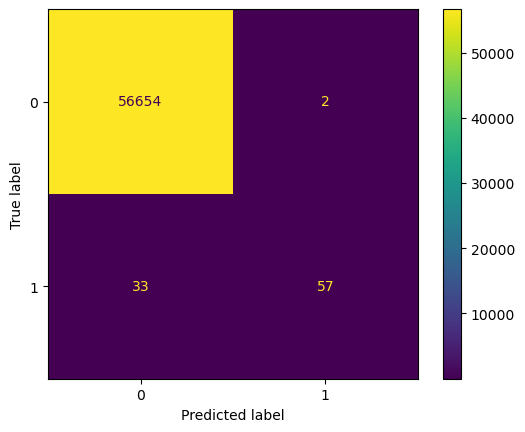

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Support Vector Machine
clf = SVC() # A Support Vector Machine calssifier instance is initiated
clf.fit(X_train, y_train) # The Support Vector Machine classifier is trained with the training data
y_pred = clf.predict(X_test) # The training model is used to predict the labels for the test data

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # The confusion matrix is computed by comparing the true labels (y_test) and the predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # A display object is created for the confusion matrix
disp.plot() # The confusion matrix is plotted by using heatmap like visualization

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel() # The confusion matrix is falttened to extract the TN, FP,FN and TP values
print(f"True Positives (TP): {tp}") # The number of true positives is printed
print(f"True Negatives (TN): {tn}") # The number of true negatives is printed
print(f"False Positives (FP): {fp}") # The number of false positives is printed
print(f"False Negatives (FN): {fn}") # The number of false neagtives is printed